# 6. PRE-PROCESSING

Preprocessing of data is used to solve missing data problem and convert label to binary numbers for denoting spam and not spam mails.The given commands are used for data preprocessing.

Import the libraries.

In [1]:
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sn

Load the data from emails.csv file.

In [2]:
df = pd.read_csv('emails.csv')
df.head(5)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


Print the shape (Get the number of rows and cols).

In [3]:
df.shape

(3032, 2)

Get the column names.

In [4]:
df.columns

Index(['email', 'label'], dtype='object')

Checking for duplicates and removing them.

In [5]:
df.drop_duplicates(inplace = True)

Show the new shape (number of rows & columns).

In [6]:
df.shape

(2887, 2)

Show the number of missing (NAN, NaN, na) data for each column and resolve missing data problem.

In [7]:
df.isnull().sum()

email    0
label    0
dtype: int64

As we can see our data has no missing data now so that we can now proceed to implement the program.

# 7. IMPLEMENTATION

The given commands are made using python jupyter notebook in anaconda and uses various libraries for model construction and calculating predictions.

The program is given as:

Import libraries.

In [8]:
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sn

Need to download stopwords.

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Tokenization (a list of tokens), will be used as the analyzer
1.Punctuations are [!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]
2.Stop words in natural language processing, are useless words (data).

In [10]:
def process_text(text):
    '''
    What will be covered:
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean text words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

Show the Tokenization (a list of tokens ).

In [11]:
df['email'].head().apply(process_text)

0    [date, wed, NUMBER, aug, NUMBER, NUMBER, NUMBE...
1    [martin, posted, tassos, papadopoulos, greek, ...
2    [man, threatens, explosion, moscow, thursday, ...
3    [klez, virus, die, already, prolific, virus, e...
4    [adding, cream, spaghetti, carbonara, effect, ...
Name: email, dtype: object

Convert the text into a matrix of token counts.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['email'])

Split data into 80% training & 20% testing data sets.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['label'], test_size = 0.20, random_state = 0)

Get the shape of messages_bow.

In [14]:
messages_bow.shape

(2887, 33770)

Create and train the Multinomial Naive Bayes classifier which is suitable for classification with discrete features (e.g., word counts for text classification).

In [15]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Print the classifiers prediction and actual values on the training data set.

In [16]:
#Print the predictions
print(classifier.predict(X_train))
#Print the actual values
print(y_train.values)

[1 0 0 ... 0 1 1]
[1 0 0 ... 0 1 1]


Print the classifiers prediction and actual values on the test data set.

In [17]:
#Print the predictions
print('Predicted value: ',classifier.predict(X_test))
#Print Actual Label
print('Actual value: ',y_test.values)

Predicted value:  [0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 

# 8.PERFORMANCE MEASURE

Here we are calculating precision, recall, F1 score, support and accuracy for both test data and training datasets. We are also calculating confusion matrix for both data sets whioch let us know how each data is classified. The performance measure is given for both training and test data as given below.

Evaluate the model on the training data set.

In [18]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
cm = confusion_matrix(y_train,pred)
print('Confusion Matrix: \n',cm)
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1960
           1       1.00      0.98      0.99       349

    accuracy                           1.00      2309
   macro avg       1.00      0.99      0.99      2309
weighted avg       1.00      1.00      1.00      2309

Confusion Matrix: 
 [[1959    1]
 [   6  343]]

Accuracy:  0.9969683845820702


Evaluate the model on the test data set.

In [19]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))
cm = confusion_matrix(y_test,pred) 
print('Confusion Matrix: \n',cm)
print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       492
           1       0.95      0.95      0.95        86

    accuracy                           0.99       578
   macro avg       0.97      0.97      0.97       578
weighted avg       0.99      0.99      0.99       578

Confusion Matrix: 
 [[488   4]
 [  4  82]]

Accuracy:  0.986159169550173


# 9.VISUALISTION

In this project we are using heatmaps of confusion matrix for data visualisation. Heat maps mare constructed using matplotlib.pyplot library. The visualisation for both test data set and training data set is given as:

Plot confusion matrix as heatmap for training data set.

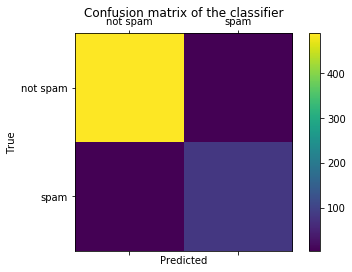

In [20]:
import matplotlib.pyplot as plt
labels = ['not spam', 'spam']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Plot confusion matrix as heatmap for test data set.

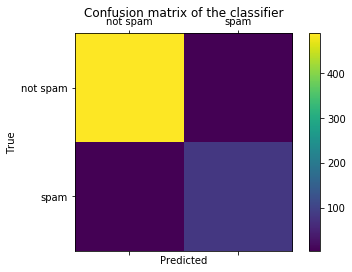

In [21]:
import matplotlib.pyplot as plt
labels = ['not spam', 'spam']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()